## Gathering Data form External CSV File 

In [57]:
#import libraries and load dataset

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt

df=pd.read_csv('./tmdb-movies.csv')

    

# Define Question
> #### is there any colleration between budget and revenue?
> #### what is biggest 10 category revenue based on genres ?
> #### what is  10 movies reached hiahest revenue befer ten years?
> #### compare the result from last question to last year now ?
> #### compare budget and revenue over last ten years ?
> #### based on vote_count is sastified of people is there any corr between vote_count and budget_ads
> #### is there any corr between budget_adj and revenue_adj? and how mach the diff ?



In [48]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#  data Wrangling >  data Gathering >  data Assessting > data cleaning 




In [28]:
#deleted columns that's we don't need it 
df.drop(['cast','overview','tagline'],axis=1,inplace=True)

In [29]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [30]:
#counts rows and columns 
df.shape

(10866, 18)

In [31]:
#info for check datatype incorrect and misssing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   keywords              9373 non-null   object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

### data cleaning

> * there is missing data in ['homepage','tagline','keywords','production_companies','genres','director','imdb_id']
 
> * we have to optimize the dataset its 1.6+ MB like ['runtime','vote_count','vote_average']
 
> * to more optimize dataset we have to change datatype of some column to category datatype like ['geners','production_companies']
 
> * we have to change incorrect datatype like ['release_date']

In [32]:
df.homepage.unique()

array(['http://www.jurassicworld.com/', 'http://www.madmaxmovie.com/',
       'http://www.thedivergentseries.movie/#insurgent', ...,
       'http://www.animalhouse.com/',
       'http://www.mgm.com/#/our-titles/1092/The-Last-Waltz/',
       'http://en.wikipedia.org/wiki/Hooper_(film)'], dtype=object)

In [33]:
#first remove duplecates rows 
df.duplicated().sum()

1

In [34]:
#remove duplicated data
df.drop_duplicates(inplace=True)

In [35]:
#recheck if we removed duplecates rows 
df.duplicated().sum()

0

In [36]:
#dealing with missing data  
df.dropna(how='any',axis=0,inplace=True)

In [40]:
#change datatype for incorrct datatype columns and optimize dataset to reduce the size of dataset
df['genres']= df['genres'].astype('category')
df['production_companies']= df['production_companies'].astype('category')
df['release_date'] = pd.to_datetime(df['release_date'])


In [38]:
#optimize more column from int64 and float64
df['runtime']= df['runtime'].astype('int8')
df['vote_count']= df['vote_count'].astype('int32')
df['vote_average']= df['vote_average'].astype('float32')


df.info()

## Exploratory Data Analysis (EDA)


In [41]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,-120,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,-119,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


## is there any correlation between budget and revenue?

In [56]:
#calculate Correltion between budget and revenue 
correlation_matrix=df['budget'].corr(df['revenue'])
correlation_matrix

0.7349006819076118

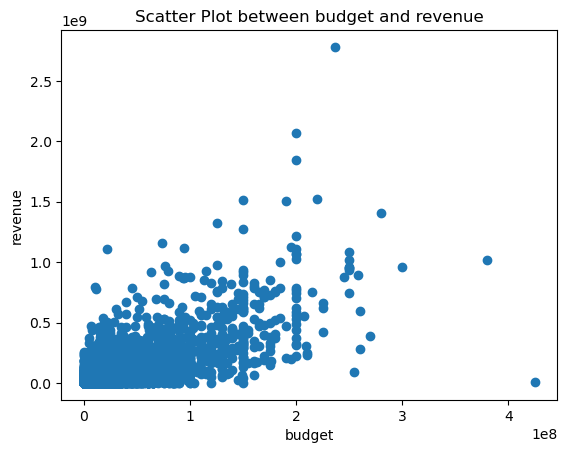

In [59]:
#visualize the relationship between budget and revenue 
plt.scatter(df['budget'],df['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('Scatter Plot between budget and revenue')
plt.show()

## there is no correlation between budget and revenue